# BRASIL EM DADOS | INTRODUÇÃO À CIÊNCIA DOS DADOS

**Grupo:** Estela Miranda Batista, 3305 | João Marcos Alves Modesto Ramos, 3506 | Roniel Barbosa, 

In [113]:
import warnings
warnings.filterwarnings("ignore")

In [1]:
# Importando as Bibliotecas Utilizadas
import pandas as pd

# Dataframe de Covid
path1 = "./Dados/Covid/HIST_PAINEL_COVIDBR_2020_Parte1_22ago2021.csv"
path2 = "./Dados/Covid/HIST_PAINEL_COVIDBR_2020_Parte2_22ago2021.csv"
path3= "./Dados/Covid/HIST_PAINEL_COVIDBR_2021_Parte1_22ago2021.csv"
path4 = "./Dados/Covid/HIST_PAINEL_COVIDBR_2021_Parte2_22ago2021.csv"
path = [path1,path2,path3,path4]
df_from_each_file = (pd.read_csv(f,error_bad_lines=False,sep=';') for f in path)
dadosCovid = pd.concat(df_from_each_file, ignore_index=True)

# Dataframe de Vacina
path5 = "./Dados/Vacina/dadosTipoVacina.xlsx"
dadosTipoVacina = pd.read_excel(path5)

# Dados Eleições
pathPIB = "./Dados/eleicoesPIB.csv"
dadosEleicaoPIB = pd.read_csv(pathPIB).set_index('Estado')


C:\Users\raito\anaconda3\envs\data_science\lib\site-packages\pandas\core\reshape\concat.py:348: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  objs = list(objs)


## 🔵 PREPARAÇÃO DOS DADOS

### Dados do Covid-19

### Dados da Vacinação

### Dados das Eleições e PIB

In [2]:
# Preparação dos Dados da Covid-19

# Remoção dos Atributos não uUilizados na Análise
dadosCovid = dadosCovid.drop(columns=['coduf','codmun','codRegiaoSaude','nomeRegiaoSaude','Recuperadosnovos','emAcompanhamentoNovos','interior/metropolitana'])
dadosCovid = dadosCovid[dadosCovid.estado != 0]

In [3]:
# Preparação dos Dados da Vacinação
dadosTipoVacina = dadosTipoVacina.drop(columns=['Cód. IBGE'])

## 🟣 QUESTIONAMENTOS LEVANTADOS, E SUAS RESPOSTAS

### 🔢 Casos de Covid-19

1. Amostragem dos casos de covid por estado.

In [4]:
dadosPorEstado = dadosCovid[(dadosCovid.data == '2021-08-22') & (dadosCovid.municipio.isna()) & (dadosCovid.estado.isna() == False) & (dadosCovid.populacaoTCU2019.isna() == False)]
dadosPorEstado = dadosPorEstado.drop(['municipio'],axis = 1)
dadosPorEstado["PorcentagemCasos"] =  round(((dadosPorEstado.casosAcumulado / dadosPorEstado.populacaoTCU2019) * 100 ),2)
dadosPorEstado

,regiao,estado,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,PorcentagemCasos
2591332,Norte,RO,2021-08-22,34,1777225.0,261946.0,66,6455,1,14.74
2591385,Norte,AC,2021-08-22,34,881935.0,87680.0,2,1809,0,9.94
2591438,Norte,AM,2021-08-22,34,4144597.0,423058.0,190,13652,1,10.21
2591491,Norte,RR,2021-08-22,34,605761.0,122960.0,129,1927,1,20.30
2591544,Norte,PA,2021-08-22,34,8602865.0,580622.0,36,16355,4,6.75
2591597,Norte,AP,2021-08-22,34,845731.0,122261.0,8,1947,2,14.46
2591650,Norte,TO,2021-08-22,34,1572866.0,216559.0,167,3650,4,13.77
2591703,Nordeste,MA,2021-08-22,34,7075181.0,345949.0,117,9922,6,4.89
2591756,Nordeste,PI,2021-08-22,34,3273227.0,314821.0,142,6924,4,9.62
2591809,Nordeste,CE,2021-08-22,34,9132078.0,928921.0,357,23955,2,10.17


2. Qual estado tem o maior número de casos de covid?

In [5]:
MaiorCasosAcumulados = dadosPorEstado.sort_values('casosAcumulado',ascending=False).iloc[0].estado
MaiorCasosNovos = dadosPorEstado.sort_values('casosNovos',ascending=False).iloc[0].estado
taxaCasos = dadosPorEstado.sort_values('PorcentagemCasos',ascending=False).iloc[0].estado

print("O estado com o maior número de casos acumulado é "+MaiorCasosAcumulados+" e o que apresenta o maior número de casos novos é o estado "+MaiorCasosNovos
+ " e o estado com a maior taxa de infectados é "+taxaCasos)

O estado com o maior número de casos acumulado é SP e o que apresenta o maior número de casos novos é o estado SP e o estado com a maior taxa de infectados é RR


3. Qual estado apresentou o maior número de casos novos de covid em um determinado dia? (CORRIGIR)


In [81]:
taxaCasos = dadosPorEstado.sort_values('casosNovos',ascending=False).iloc[0]
taxaCasos,numCasos = taxaCasos.estado,taxaCasos.casosNovos

print("O estado com a maior taxa de mortos por COVID é o "+taxaCasos+" com "+str(numCasos)+" casos")


O estado com a maior taxa de mortos por COVID é o SP com 3190 casos


4. Qual estado tem a maior taxa de infectados por covid?

In [74]:
taxaCasos = dadosPorEstado.sort_values('PorcentagemCasos',ascending=False).iloc[0].estado
print("🟡 Estado com Maior Taxa de Infectados: %s" % (taxaCasos))

🟡 Estado com Maior Taxa de Infectados: RR


5. Qual a maior taxa de cresccimento de casos de covid em cada estado? Em que período isso ocorreu?

In [7]:
data = dadosCovid[(dadosCovid.municipio.isna()) & (dadosCovid.estado.isna() == False) & (dadosCovid.populacaoTCU2019.isna() == False) & (dadosCovid.estado != 0)]
data = data[data["casosNovos"] >= 0] 
data = data[data["obitosNovos"] >= 0] 



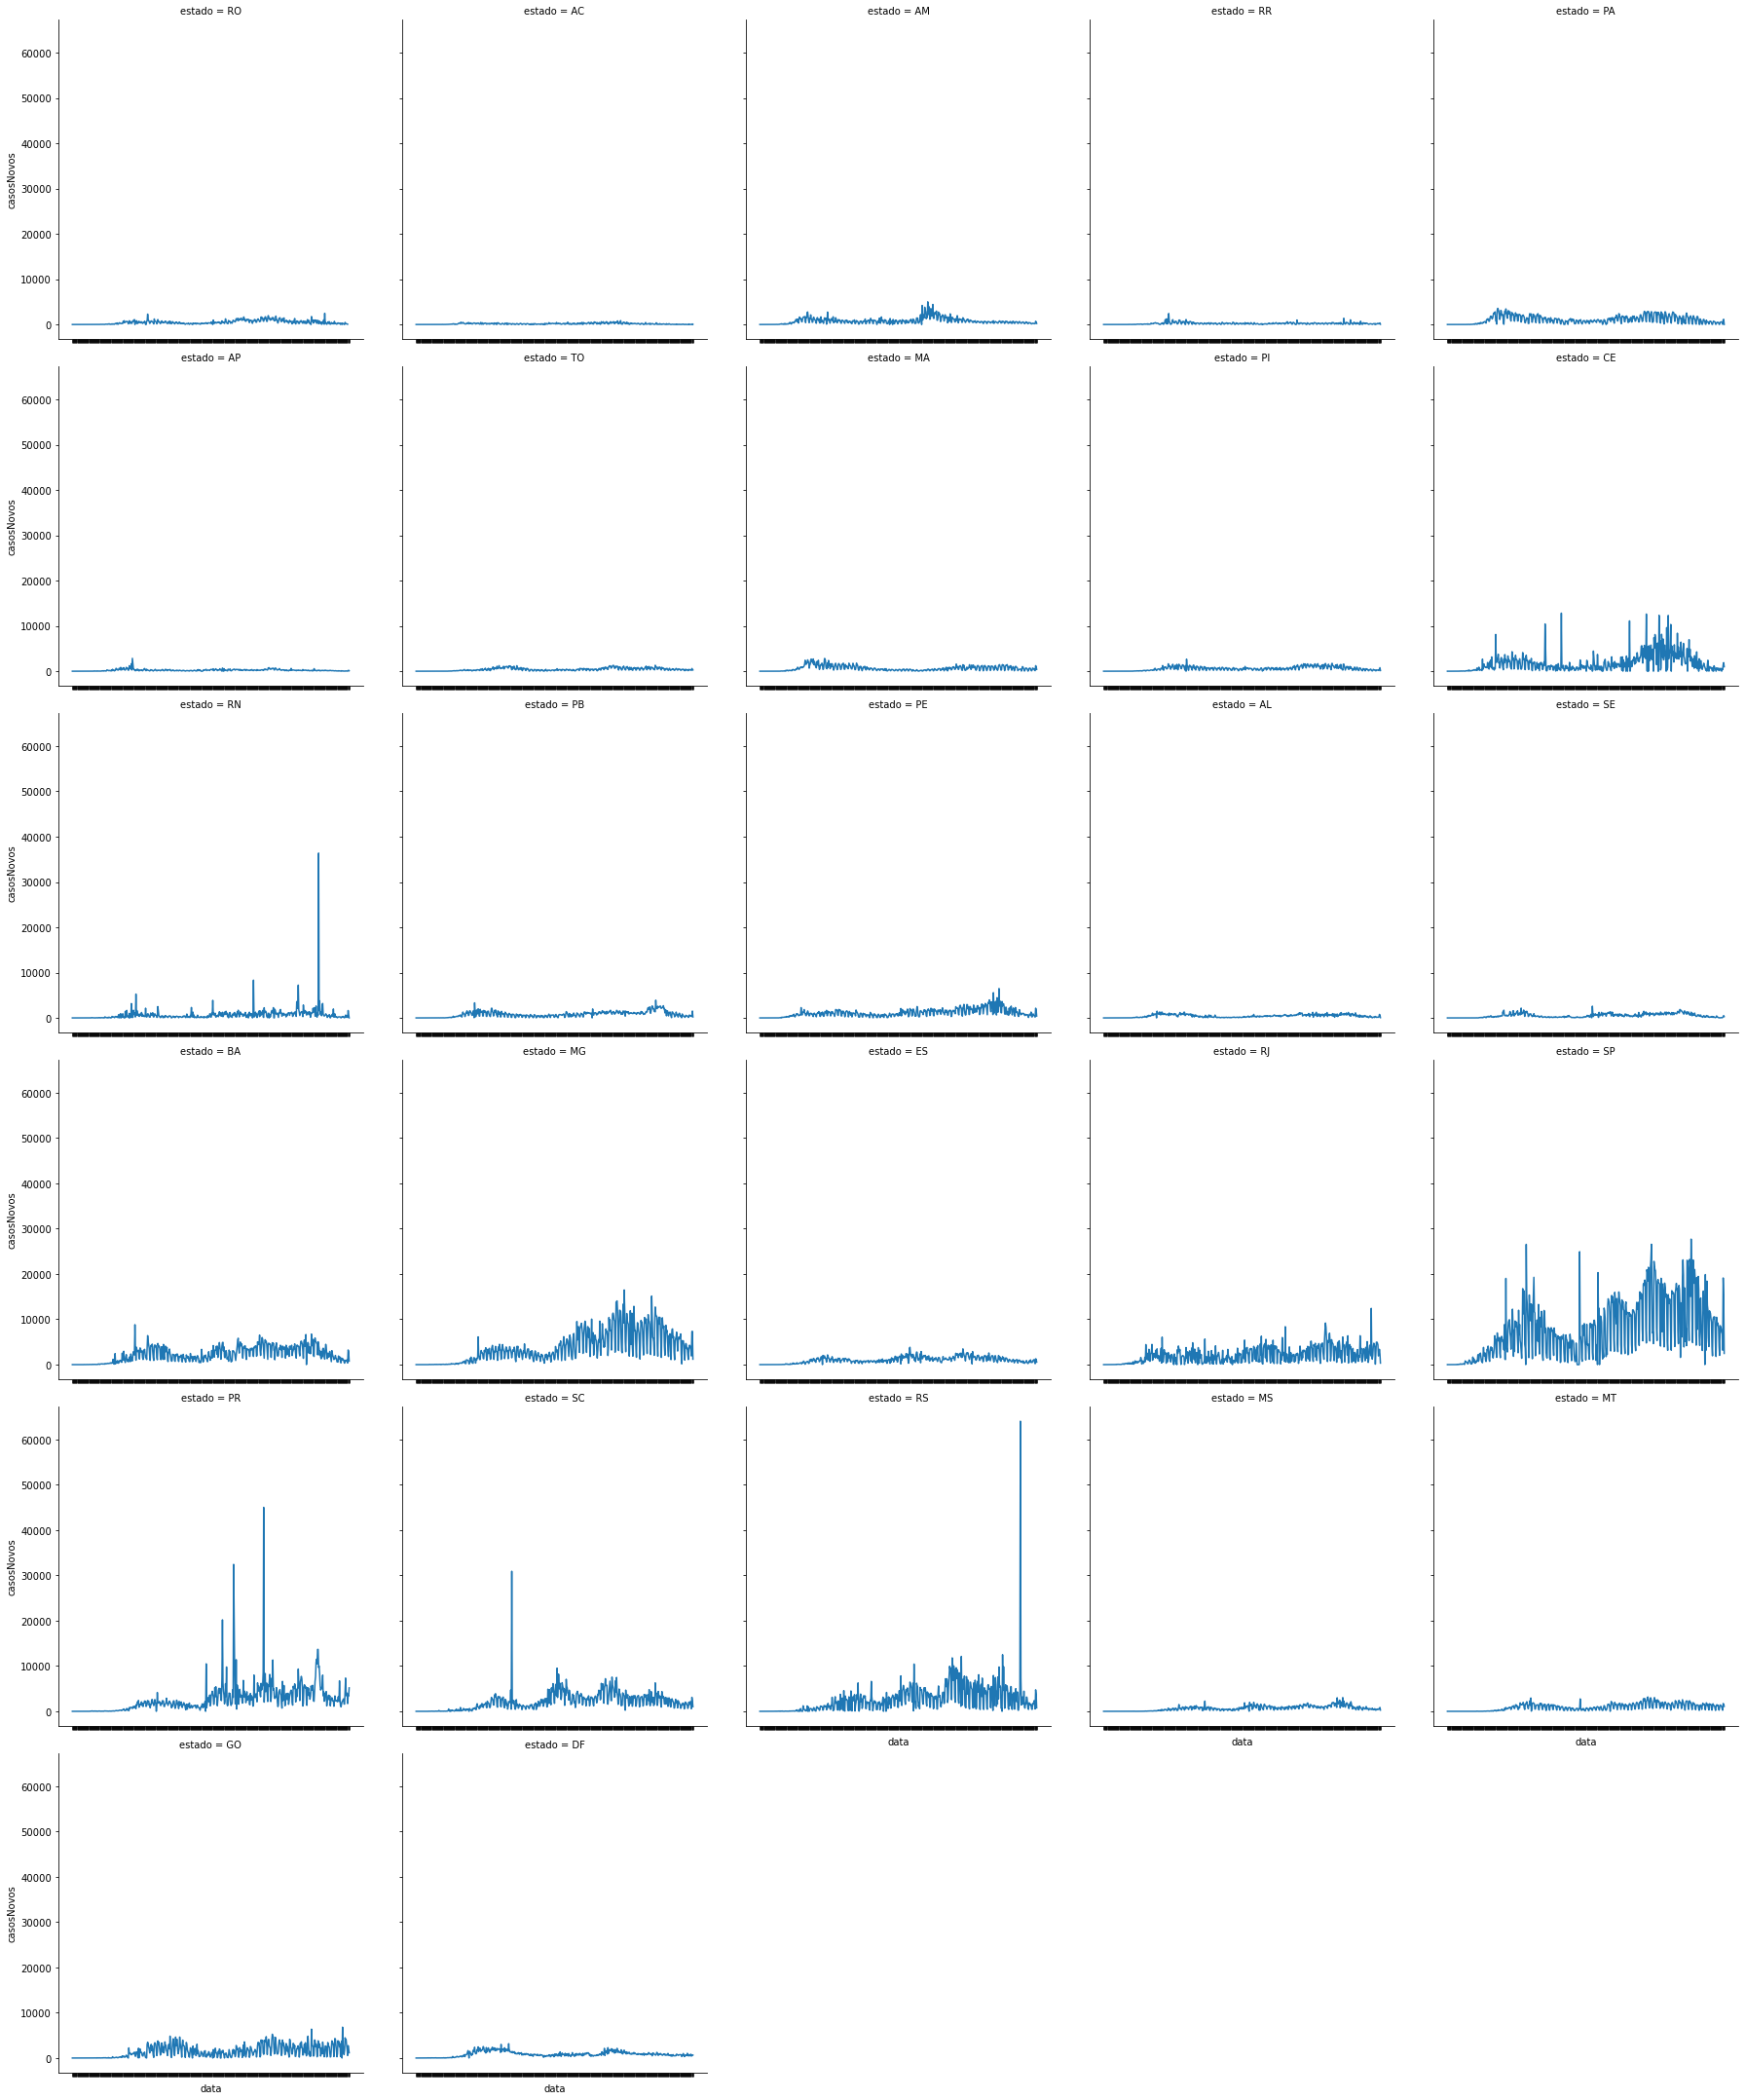

In [8]:

import matplotlib.pyplot as plt
import seaborn as sns

plotar = data[['estado','data','casosNovos']]

g = sns.relplot(x='data', y='casosNovos', kind="line", col='estado', col_wrap= 5,data = plotar)
g.set(xticklabels=[])




6. Qual a maior taxa de cresccimento de óbitos de covid em cada estado? Em que período isso ocorreu?


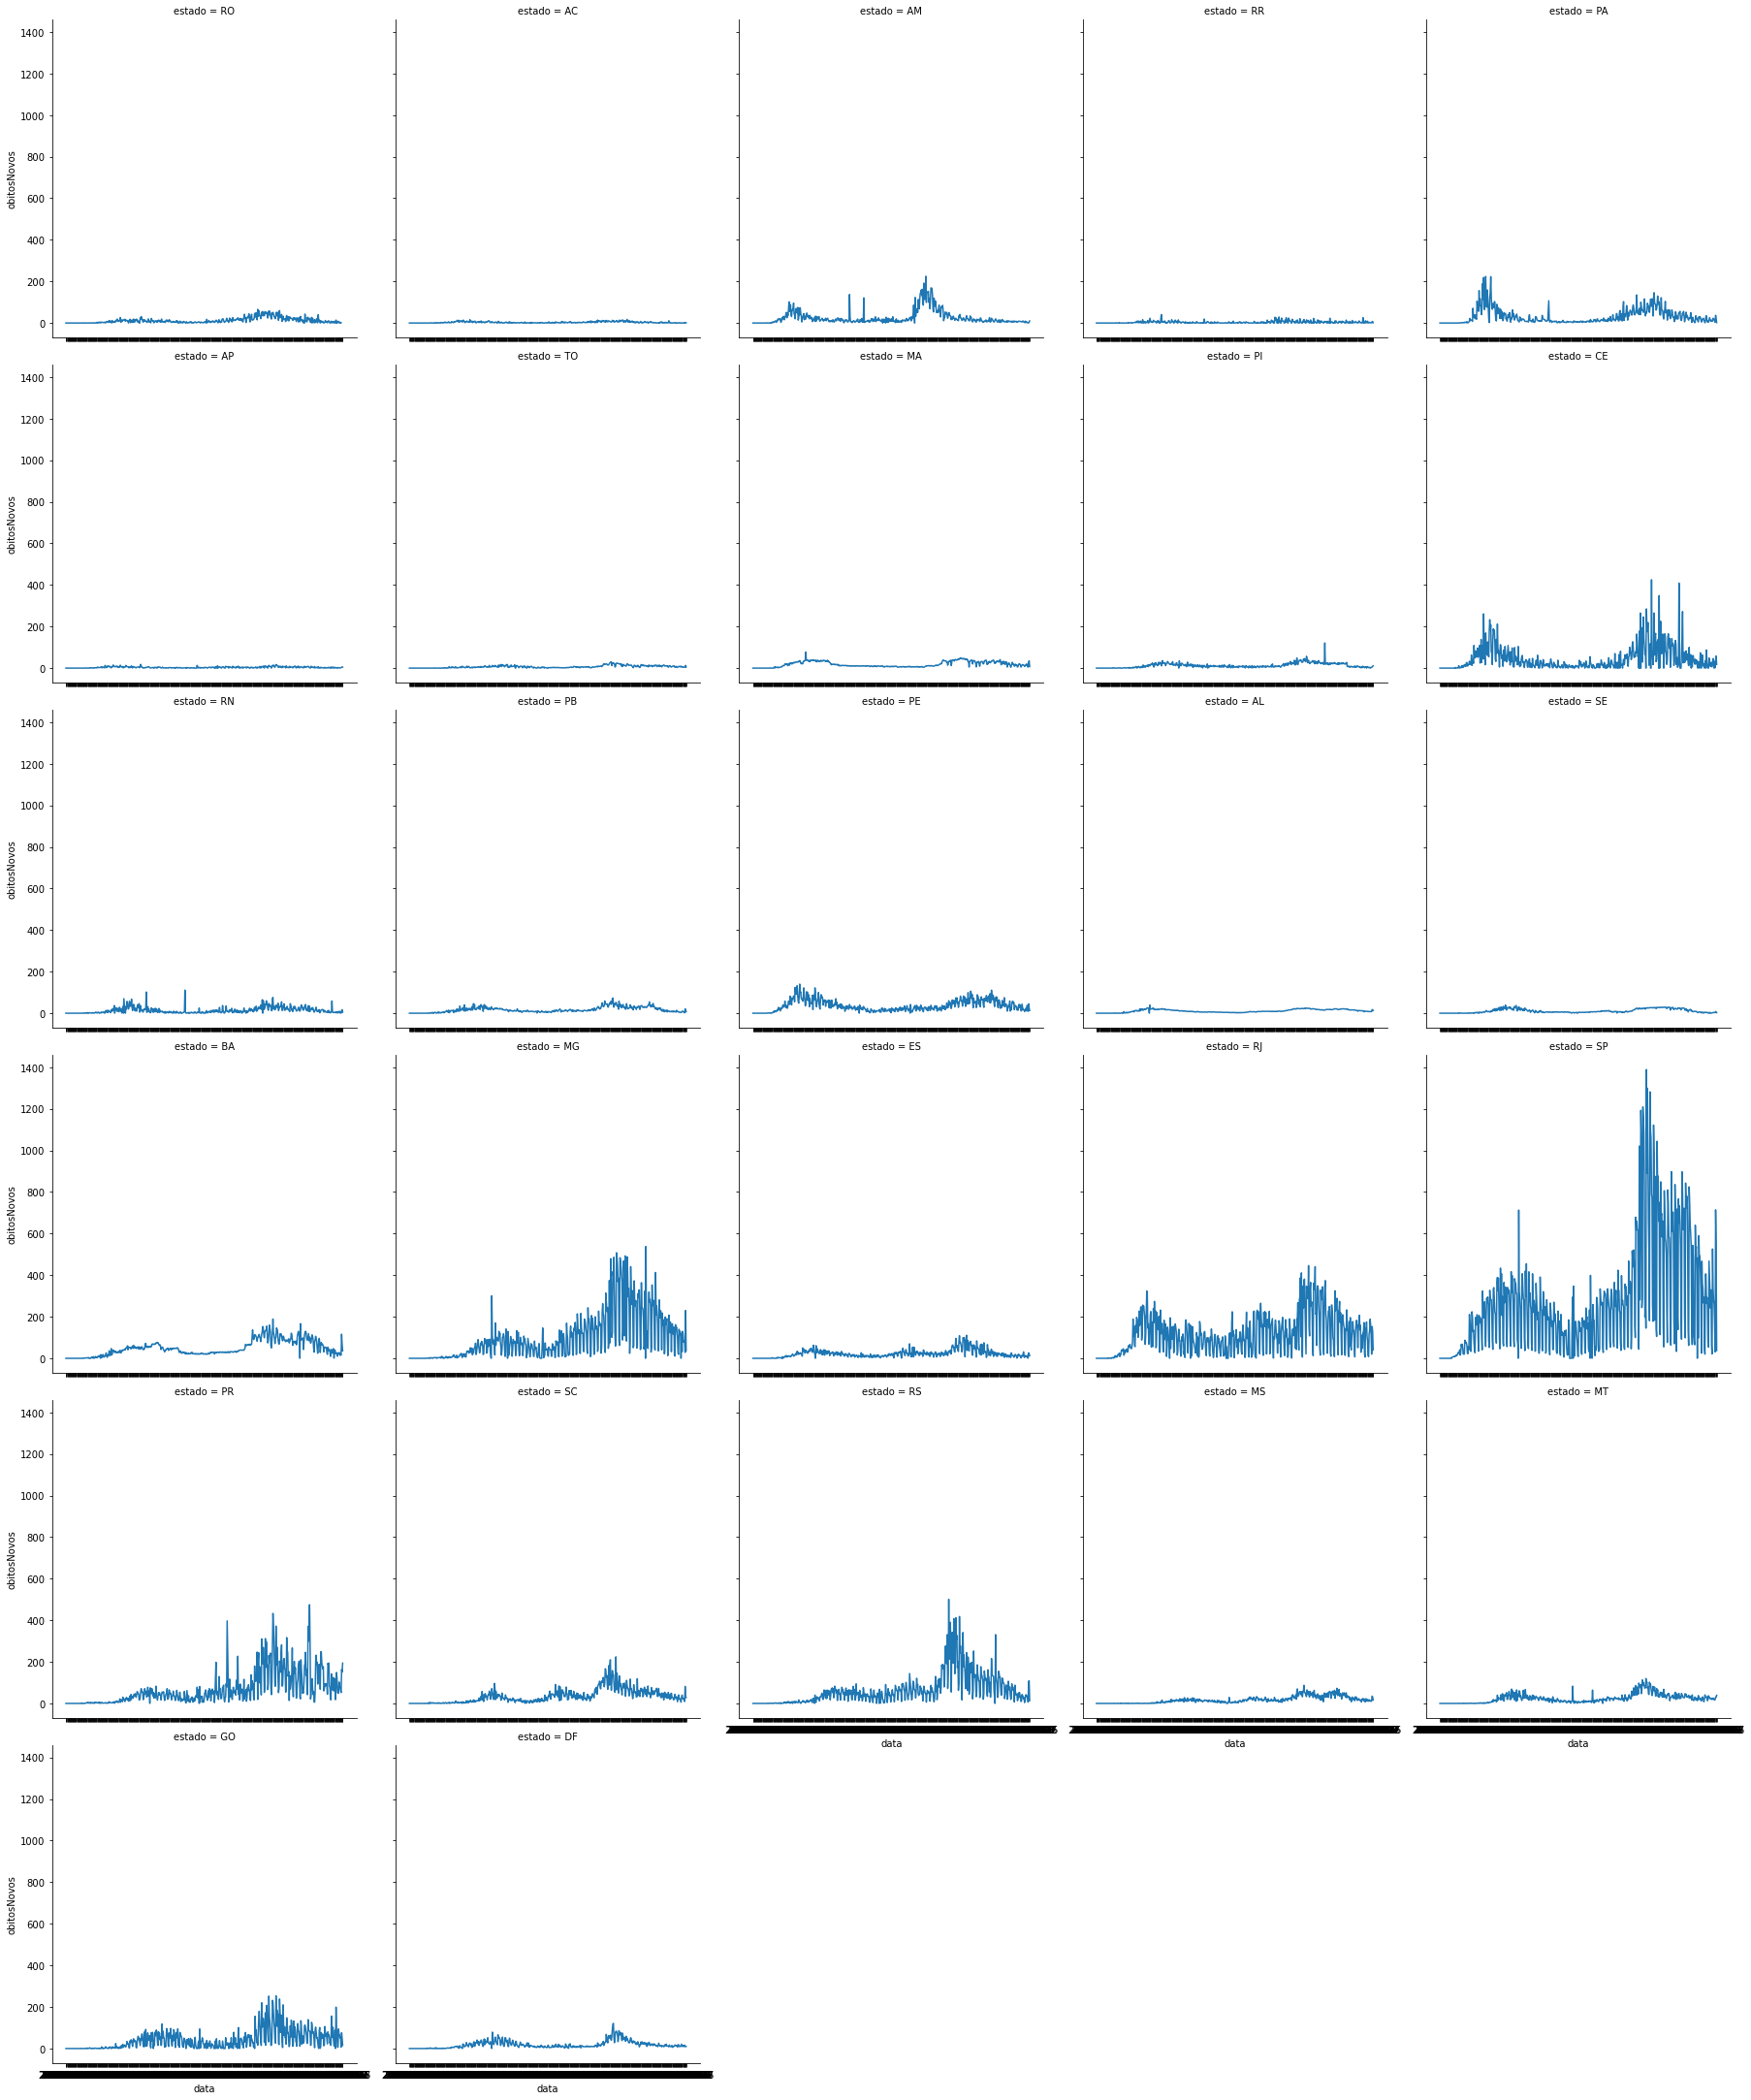

In [9]:

import seaborn as sns

plotar = data[['estado','data','obitosNovos']]

g = sns.relplot(x='data', y='obitosNovos', kind="line", col='estado', col_wrap= 5,data = plotar)


7. Qual o estado que teve a maior taxa de mortalidade? (a taxa de mortalidade consiste no número de óbitos dividido pelo número de casos)

In [10]:
dadosPorEstado['PorcentagemMortes'] = round((dadosPorEstado.obitosAcumulado / dadosPorEstado.casosAcumulado * 100 ),2)
taxaMortos = dadosPorEstado.sort_values('PorcentagemMortes',ascending=False).iloc[0].estado

print("O estado com a maior taxa de mortos por COVID é o "+taxaMortos)


O estado com a maior taxa de mortos por COVID é o RJ


### 📈 Taxa de Vacinação

8. Amostragem dos dados de vacinação por estado.


In [110]:
path = "./Dados/Vacina/dadosVacinacaoData.xlsx"

dfDadosVacinacaoData = pd.read_excel(path)
dfDadosVacinacaoData = dfDadosVacinacaoData[dfDadosVacinacaoData["Data Vacinação"] != '-']


,UF,Data Vacinação,quantidade
0,AC,2021-01-18 00:00:00,1
1,AC,2021-01-19 00:00:00,45
2,AC,2021-01-20 00:00:00,1019
3,AC,2021-01-21 00:00:00,1611
4,AC,2021-01-22 00:00:00,1106
...,...,...,...
5909,TO,2021-08-17 00:00:00,13756
5910,TO,2021-08-18 00:00:00,11255
5911,TO,2021-08-19 00:00:00,18440
5912,TO,2021-08-20 00:00:00,12227


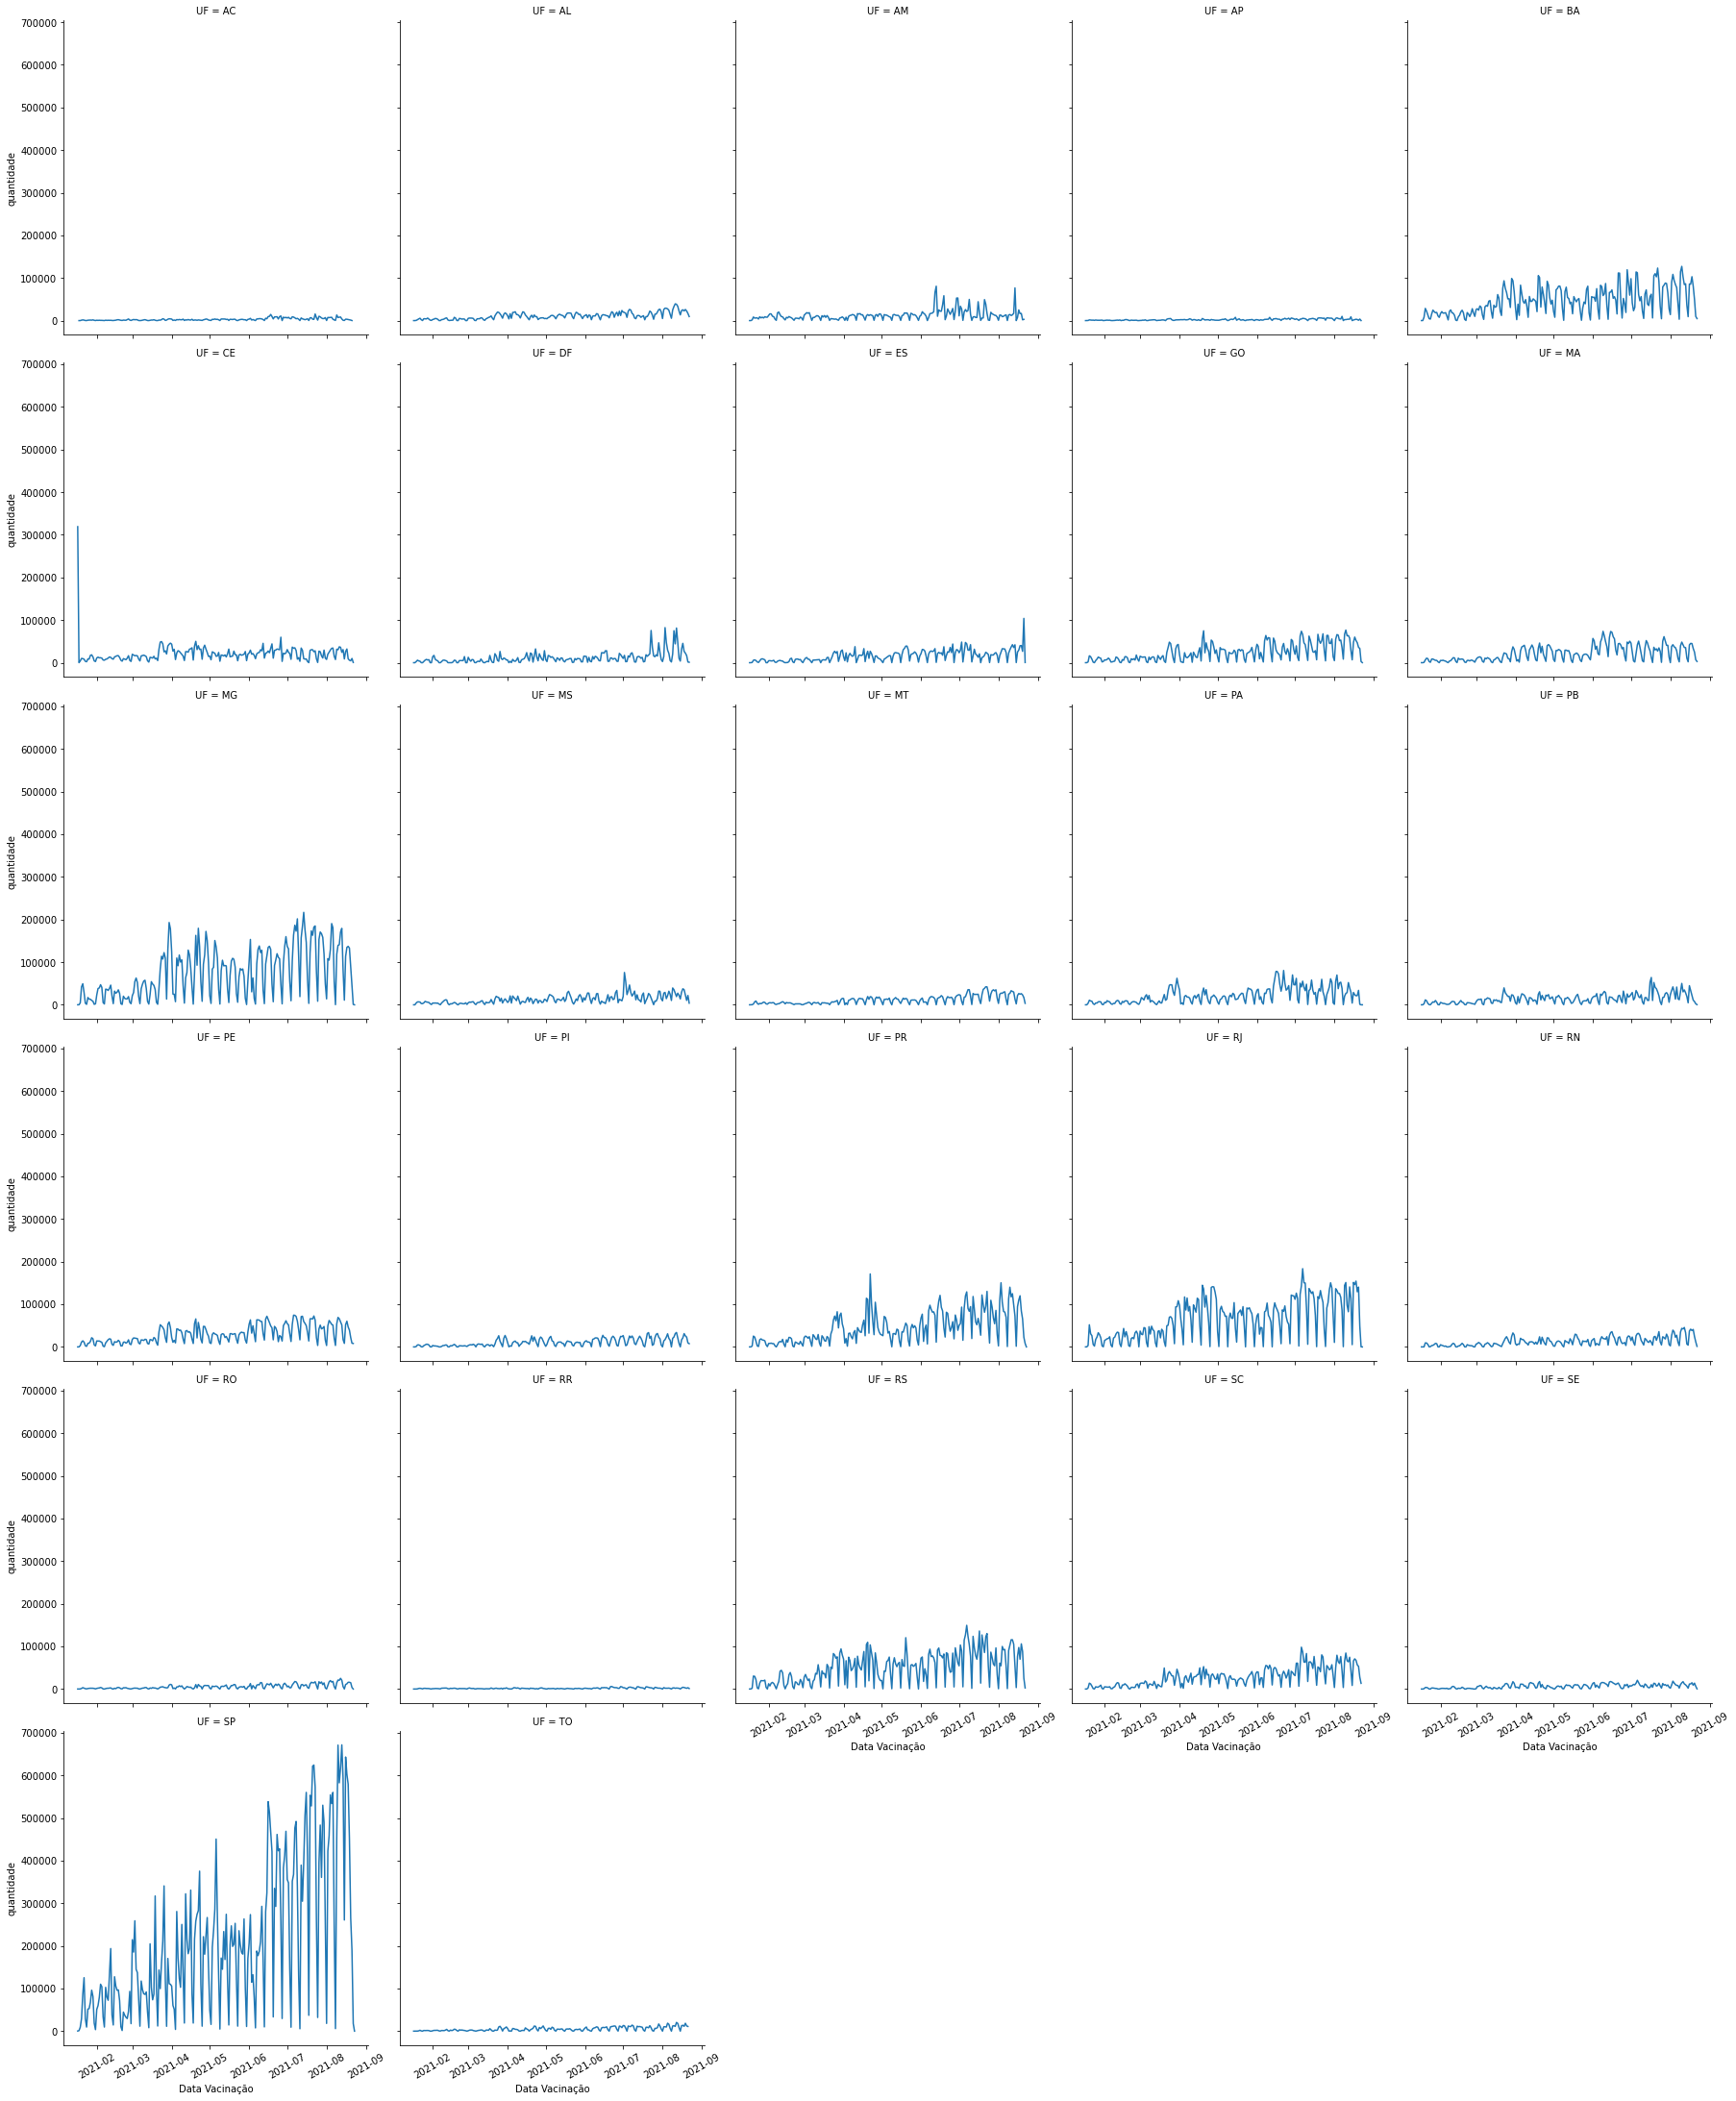

In [12]:
g = sns.relplot(x='Data Vacinação', y='quantidade', kind="line", col='UF', col_wrap= 5,data = dfDadosVacinacaoData)
g.set_xticklabels(rotation=30)


9. Qual o estado com maior taxa de vacinação?


In [13]:

import numpy as np

agrupamentoVacinas = dadosTipoVacina.groupby(by=["UF","Fabricante"]).sum()
#agrupamentoVacinas["Jansen"] = agrupamentoVacinas["Doses Aplicadas"]- agrupamentoVacinas["Dose 2"] - agrupamentoVacinas["Dose 1"]
#agrupamentoVacinas["Jansen"].sum()
teste = agrupamentoVacinas.reset_index()
teste['Vacinados'] = np.where(teste['Fabricante']=='JANSSEN', teste['Doses Aplicadas'], teste['Dose 2'])
numVacinadosPorEstado = teste.groupby(by="UF").sum()
numVacinadosPorEstado

,Doses Aplicadas,Dose 1,Dose 2,Vacinados
UF,,,,
AC,631520,444904,175333,186616
AL,2388886,1650138,684738,738748
AM,2758738,2032419,689044,726319
AP,498345,379610,108984,118735
BA,9950019,6973035,2752265,2976987
CE,4544135,3164966,1336833,1401026
DF,2452377,1776034,633308,676343
ES,3514097,2379998,1030756,1134107
GO,5394518,3825525,1420370,1568993


In [14]:
populacaoPorEstado = dadosPorEstado[["populacaoTCU2019","estado","regiao"]]
PopulacaoVacinada = populacaoPorEstado.join(numVacinadosPorEstado, on='estado')
PopulacaoVacinada["TaxaVacinados"] = round((PopulacaoVacinada.Vacinados / PopulacaoVacinada.populacaoTCU2019 )*100,2)
PopulacaoVacinada

,populacaoTCU2019,estado,regiao,Doses Aplicadas,Dose 1,Dose 2,Vacinados,TaxaVacinados
2591332,1777225.0,RO,Norte,1266956,920805,316842,349921,19.69
2591385,881935.0,AC,Norte,631520,444904,175333,186616,21.16
2591438,4144597.0,AM,Norte,2758738,2032419,689044,726319,17.52
2591491,605761.0,RR,Norte,359881,270636,79122,89245,14.73
2591544,8602865.0,PA,Norte,4777817,3449326,1219795,1328491,15.44
2591597,845731.0,AP,Norte,498345,379610,108984,118735,14.04
2591650,1572866.0,TO,Norte,1097819,785339,282901,312480,19.87
2591703,7075181.0,MA,Nordeste,4691528,3355912,1232090,1335616,18.88
2591756,3273227.0,PI,Nordeste,2352011,1658312,644826,693699,21.19
2591809,9132078.0,CE,Nordeste,4544135,3164966,1336833,1401026,15.34


In [15]:
maisVacinado = PopulacaoVacinada.sort_values('TaxaVacinados',ascending=False).iloc[0].estado
taxaDeVacina = PopulacaoVacinada.sort_values('TaxaVacinados',ascending=False).iloc[0].TaxaVacinados

print("O estado com a maior taxa de vacinação pela população, levando em conta a aplicação das duas doses em relação a população de 2019 é o estado "+
    maisVacinado + " Com " + str(taxaDeVacina)+"% da população com a 2ª dose da vacina"
)

O estado com a maior taxa de vacinação pela população, levando em conta a aplicação das duas doses em relação a população de 2019 é o estado MS Com 40.14% da população com a 2ª dose da vacina


10. Qual a região com maior taxa de vacinação?


In [16]:
regiaoVacinacao = PopulacaoVacinada.groupby(by="regiao").sum()
regiaoVacinacao["TaxaVacinados"] = round((regiaoVacinacao.Vacinados / regiaoVacinacao.populacaoTCU2019 )*100,2)
regiaoVacinacao = regiaoVacinacao.reset_index()
regiaoVacinacao

,regiao,populacaoTCU2019,Doses Aplicadas,Dose 1,Dose 2,Vacinados,TaxaVacinados
0,Centro-Oeste,16297074.0,13234147,9193683,3578996,4088728,25.09
1,Nordeste,57071654.0,37825260,26793793,10323468,11131620,19.50
2,Norte,18430980.0,11391076,8283039,2872021,3111807,16.88
3,Sudeste,88371433.0,79921500,54995281,22961647,24926456,28.21
4,Sul,29975984.0,27114449,18514882,7759326,8607318,28.71


In [17]:
maisVacinado = regiaoVacinacao.sort_values('TaxaVacinados',ascending=False).iloc[0].regiao
taxaDeVacina = regiaoVacinacao.sort_values('TaxaVacinados',ascending=False).iloc[0].TaxaVacinados

print("A região com a maior taxa de vacinação pela população, levando em conta a aplicação das duas doses em relação a população de 2019 é a região "+
    maisVacinado + " Com " + str(taxaDeVacina)+"% da população com a 2ª dose da vacina"
)

A região com a maior taxa de vacinação pela população, levando em conta a aplicação das duas doses em relação a população de 2019 é a região Sul Com 28.71% da população com a 2ª dose da vacina


11. Existe uma relação entre a taxa de vacinação e a diminuição de casos em cada estado?


In [125]:
dfDadosVacinacaoData

,UF,Data Vacinação,quantidade
0,AC,2021-01-18 00:00:00,1
1,AC,2021-01-19 00:00:00,45
2,AC,2021-01-20 00:00:00,1019
3,AC,2021-01-21 00:00:00,1611
4,AC,2021-01-22 00:00:00,1106
...,...,...,...
5909,TO,2021-08-17 00:00:00,13756
5910,TO,2021-08-18 00:00:00,11255
5911,TO,2021-08-19 00:00:00,18440
5912,TO,2021-08-20 00:00:00,12227


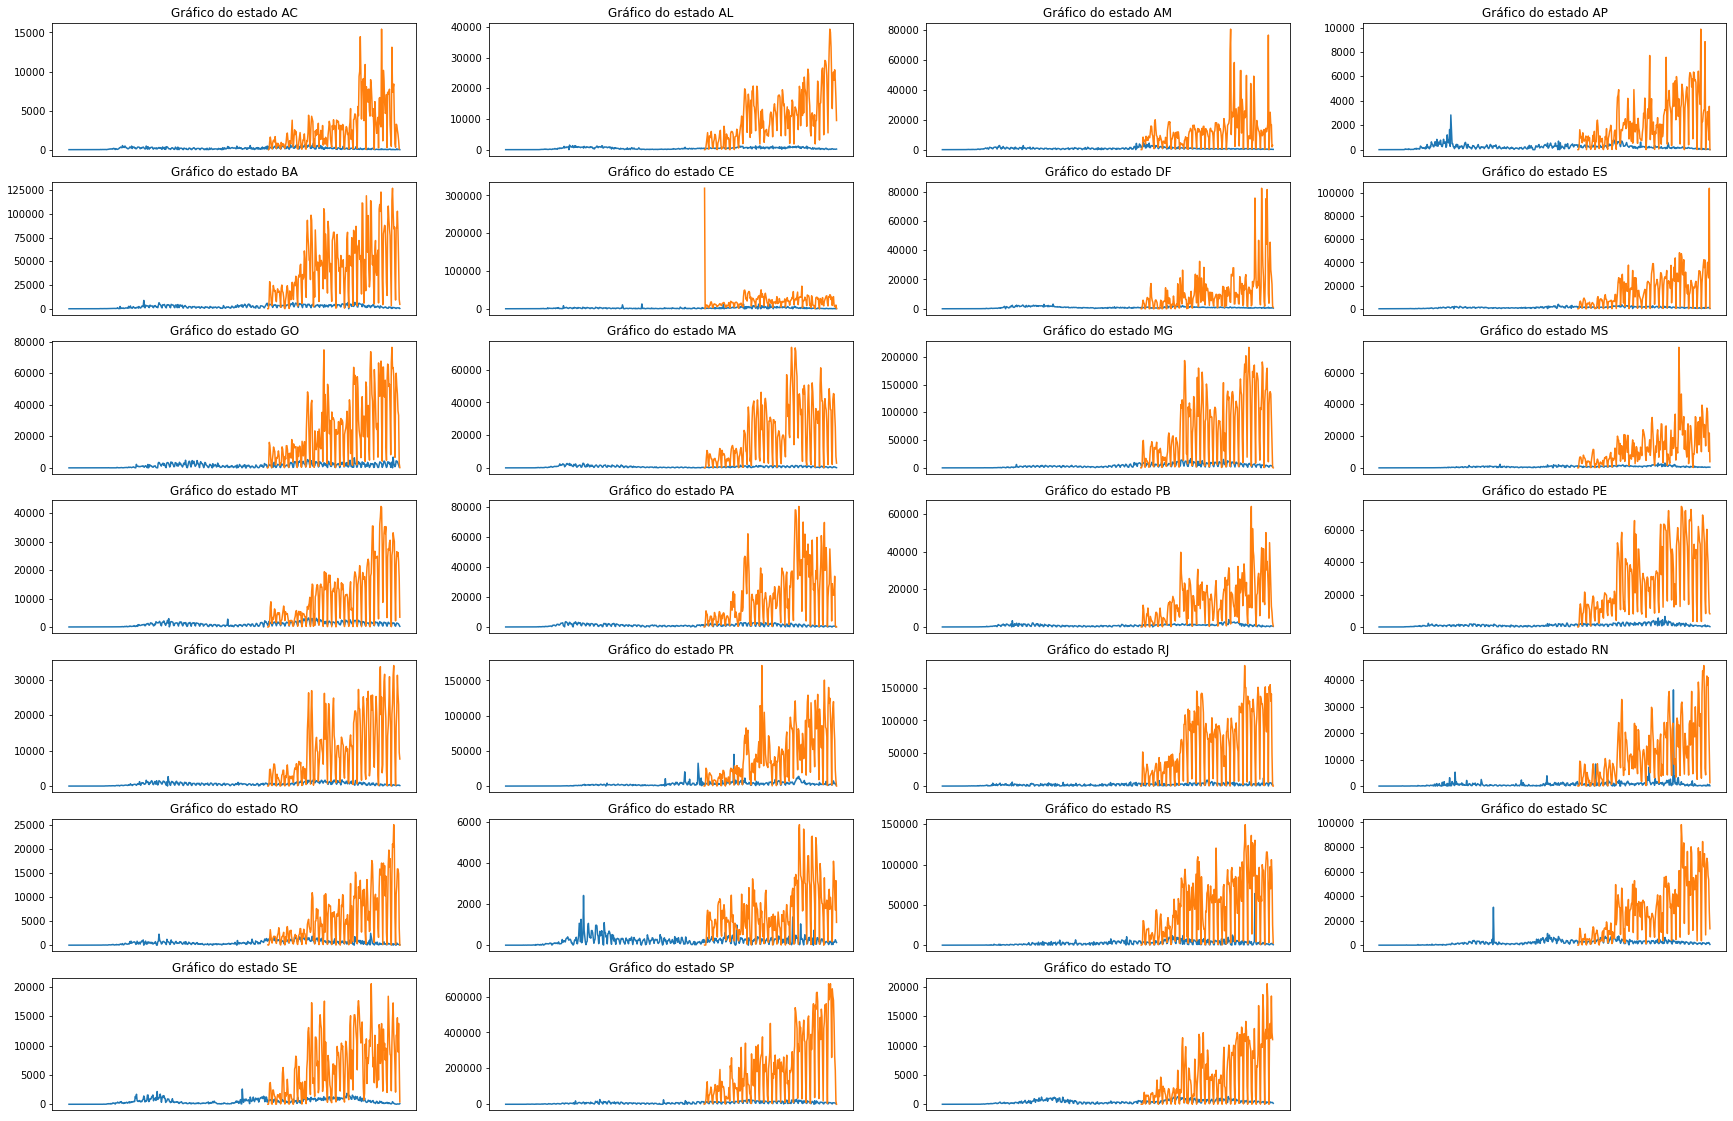

In [158]:
estados =  dfDadosVacinacaoData['UF'].unique()
plt.rcParams['figure.figsize'] = [30, 20]

for j,i in enumerate(estados):
    plt.subplot(7,4,j+1)

    dadosAC = dfDadosVacinacaoData[dfDadosVacinacaoData['UF'] == i]
    dataAC = data[data.estado == i]
    dataAC["MesAno"] = pd.to_datetime(dataAC['data'],format = '%Y/%m/%d')

    plt.plot(dataAC.MesAno,dataAC.casosNovos)
    plt.plot(dadosAC['Data Vacinação'],dadosAC.quantidade,)
    #plt.xticks(rotation=45)
    plt.title("Gráfico do estado "+str(i))
    plt.xticks([])
plt.show()

12. Existe uma relação entre a taxa de vacinação e a diminuição de casos em cada região?

In [191]:
def categorizarRegiao(estado):
    if estado in ['MT', 'GO', 'MS', 'DF']:
        return "Centro-Oeste"
    if estado in ['SP', 'MG', 'ES', 'RJ']:
        return "Sudeste"
    if estado in ['PR', 'SC', 'RS']:
        return "Sul"
    if estado in ['MA','PI','CE','RN','PB','PE','AL','SE','BA']:
        return "Nordeste"
    if estado in ['RR','AP','AM','PA','AC','RO','TO']:
        return "Norte"
    return ""

dfDadosVacinacaoData["regiao"] = dfDadosVacinacaoData.UF.apply(categorizarRegiao)
dfDadosVacinacaoData
dadosRegiaoVacina = dfDadosVacinacaoData.groupby(by=['regiao','Data Vacinação']).agg({'quantidade' : sum})
dadosRegiaoVacina = dadosRegiaoVacina.reset_index()
dadosRegiaoVacina


,regiao,Data Vacinação,quantidade
0,Centro-Oeste,2021-01-17,60
1,Centro-Oeste,2021-01-18,168
2,Centro-Oeste,2021-01-19,9102
3,Centro-Oeste,2021-01-20,30737
4,Centro-Oeste,2021-01-21,32147
...,...,...,...
1089,Sul,2021-08-19,247019
1090,Sul,2021-08-20,206529
1091,Sul,2021-08-21,75480
1092,Sul,2021-08-22,24056


In [212]:
agrupamentoRegiao = data.groupby(by=['regiao','data']).agg({'casosNovos':sum})
agrupamentoRegiao = agrupamentoRegiao.reset_index()
agrupamentoRegiao

,regiao,data,casosNovos
0,Centro-Oeste,2020-02-25,0
1,Centro-Oeste,2020-02-26,0
2,Centro-Oeste,2020-02-27,0
3,Centro-Oeste,2020-02-28,0
4,Centro-Oeste,2020-02-29,0
...,...,...,...
2720,Sul,2021-08-18,10625
2721,Sul,2021-08-19,6908
2722,Sul,2021-08-20,7960
2723,Sul,2021-08-21,7067


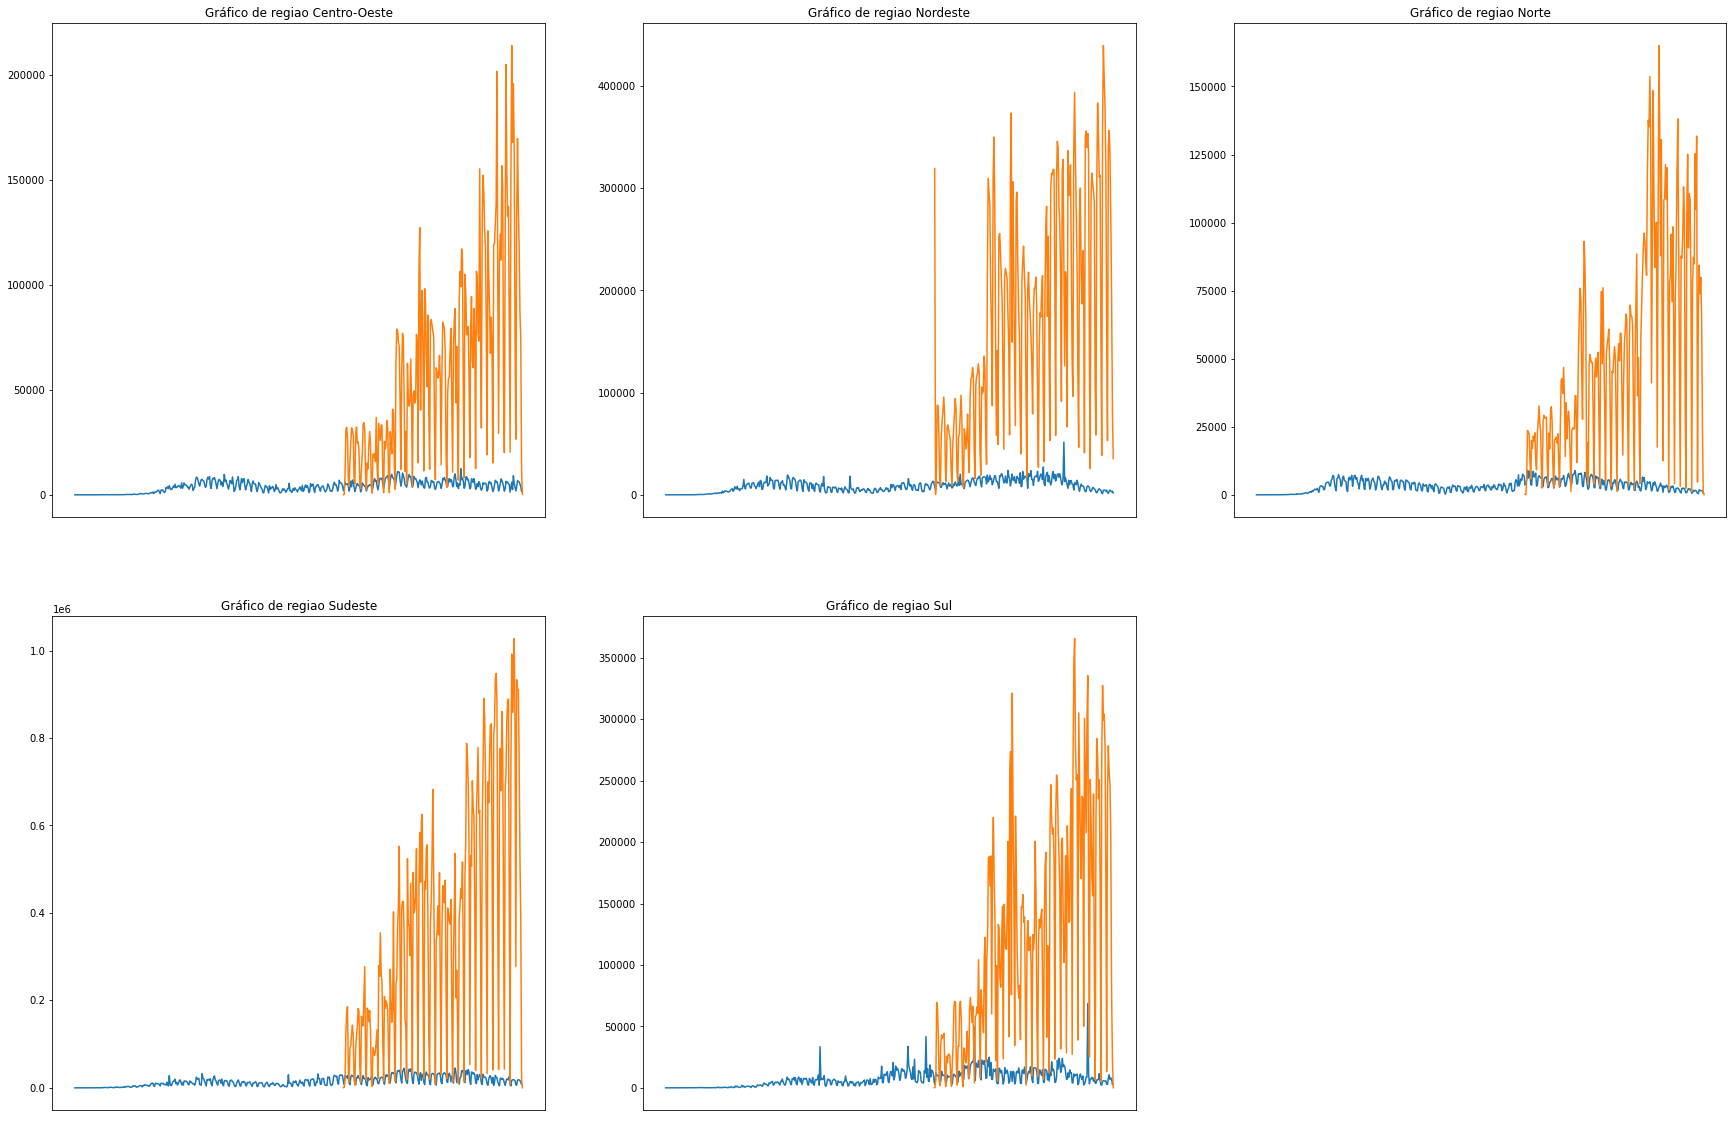

In [213]:
regiao =  dadosRegiaoVacina['regiao'].unique()
plt.rcParams['figure.figsize'] = [30, 20]

for j,i in enumerate(regiao):
    plt.subplot(2,3,j+1)

    dadosAC = dadosRegiaoVacina[dadosRegiaoVacina['regiao'] == i]
    dataAC = agrupamentoRegiao[agrupamentoRegiao.regiao == i]
    dataAC["MesAno"] = pd.to_datetime(dataAC['data'],format = '%Y/%m/%d')

    plt.plot(dataAC.MesAno,dataAC.casosNovos)
    plt.plot(dadosAC['Data Vacinação'],dadosAC.quantidade,)
    #plt.xticks(rotation=45)
    plt.title("Gráfico de regiao "+str(i))
    plt.xticks([])
plt.show()

### 💰 Situação Socioecônomica

13. Amostragem de situação socioeconômica por estado, através do PIB.


In [45]:

dadosPib = {
    'AC': 15331,
    'AL': 54413,
    'AP': 16795,
    'AM': 100109,
    'BA': 286240,
    'CE': 155904,
    'DF': 254817,
    'ES': 137020,
    'GO': 195682,
    'MA': 98179,
    'MT': 137443,
    'MS': 106969,
    'MG': 614876,
    'PR': 440029,
    'PB': 64374,
    'PA': 161350,
    'PE': 186352,
    'PI': 50378,
    'RJ': 758859,
    'RN': 66970,
    'RS': 457294,
    'RO': 44914,
    'RR': 13370,
    'SC': 298227,
    'SE': 42018,
    'SP': 2210562,
    'TO': 35666,
}
dfPIB = pd.DataFrame.from_dict(dadosPib, orient='index',columns=['PIB'])
dfPIB

,PIB
AC,15331
AL,54413
AP,16795
AM,100109
BA,286240
CE,155904
DF,254817
ES,137020
GO,195682
MA,98179


14. Os estados com menor PIB, tiveram alguma relação com o aumento de casos de covid?


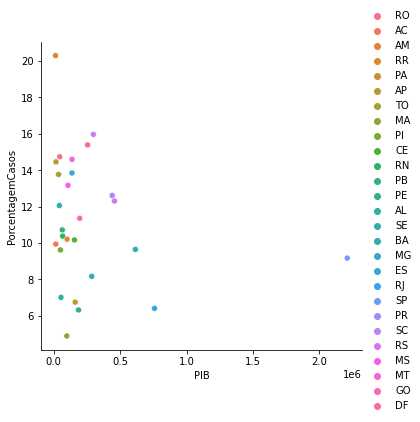

In [64]:

dfPIBCasos = dadosPorEstado.set_index('estado')
dfPIBCasos = pd.concat([dfPIBCasos,dfPIB], axis=1,join='inner')
toPlot = dfPIBCasos[['PIB','PorcentagemCasos']]
sns.relplot(x=toPlot.PIB, y=toPlot.PorcentagemCasos, hue=toPlot.index)

15. Os estados com menor PIB, tiveram alguma relação com a porcentagem de óbtos de casos de covid?


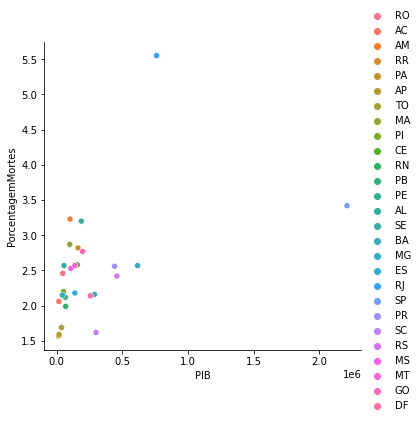

In [50]:
dfPIBObitos = dadosPorEstado.set_index('estado')
dfPIBObitos = pd.concat([dfPIBCasos,dfPIB], axis=1,join='inner')
toPlot = dfPIBCasos[['PIB','PorcentagemMortes']]
sns.relplot(x=toPlot.PIB, y=toPlot.PorcentagemMortes, hue=toPlot.index)

16. Os estados com menor PIB, tiveram alguma relação com a taxa de vacinação de casos de covid?m

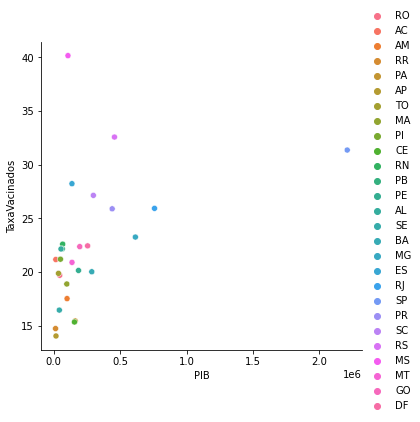

In [69]:
dfPIBVacina = PopulacaoVacinada.set_index('estado')
dfPIBVacina = pd.concat([dfPIBVacina,dfPIB], axis=1,join='inner')
dfPIBVacina
toPlot = dfPIBVacina[['PIB','TaxaVacinados']]
sns.relplot(x=toPlot.PIB, y=toPlot.TaxaVacinados, hue=toPlot.index)

### 💼 Situação Política

17. Amostragem de votos durante a última eleição a favor do atual presidente.


In [58]:
dadosVotos =  {
    'AC': 62.24,
    'AL': 34.40,
    'AP': 40.74,
    'AM': 43.48,
    'BA': 23.41,
    'CE': 21.74,
    'DF': 58.37,
    'ES': 54.76,
    'GO': 57.24,
    'MA': 24.28,
    'MT': 60.04,
    'MS': 55.06,
    'MG': 48.31,
    'PR': 56.89,
    'PB': 31.30,
    'PA': 36.19,
    'PE': 30.57,
    'PI': 18.76,
    'RJ': 59.79,
    'RN': 30.21,
    'RS': 52.63,
    'RO': 62.24,
    'RR': 62.97,
    'SC': 65.82,
    'SE': 27.21,
    'SP': 53.00,
    'TO': 44.64,
}

dfVotos = pd.DataFrame.from_dict(dadosVotos, orient='index',columns=['PorcentagemVotos'])
dfVotos

,PorcentagemVotos
AC,62.24
AL,34.40
AP,40.74
AM,43.48
BA,23.41
CE,21.74
DF,58.37
ES,54.76
GO,57.24
MA,24.28


18. O apoio ao presidente tem alguma relação com as regiões com maior taxa de casos de covid?


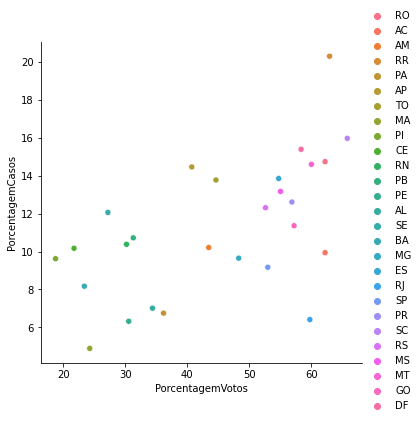

In [65]:
dfVotosCasos = dadosPorEstado.set_index('estado')
dfVotosCasos = pd.concat([dfPIBCasos,dfVotos], axis=1,join='inner')
toPlot = dfVotosCasos[['PorcentagemVotos','PorcentagemCasos']]
sns.relplot(x=toPlot.PorcentagemVotos, y=toPlot.PorcentagemCasos, hue=toPlot.index)

19. O apoio ao presidente tem alguma relação com as regiões com maior taxa de óbitos de covid?


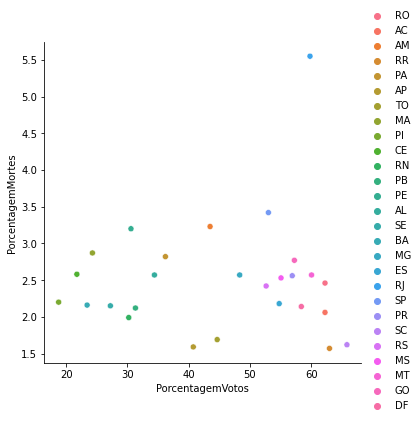

In [68]:
dfVotosObitos = dadosPorEstado.set_index('estado')
dfVotosObitos = pd.concat([dfVotosObitos,dfVotos], axis=1,join='inner')
toPlot = dfVotosObitos[['PorcentagemVotos','PorcentagemMortes']]
sns.relplot(x=toPlot.PorcentagemVotos, y=toPlot.PorcentagemMortes, hue=toPlot.index)

20. O apoio ao presidente tem alguma relação com as regiões com maior taxa de vacinação?

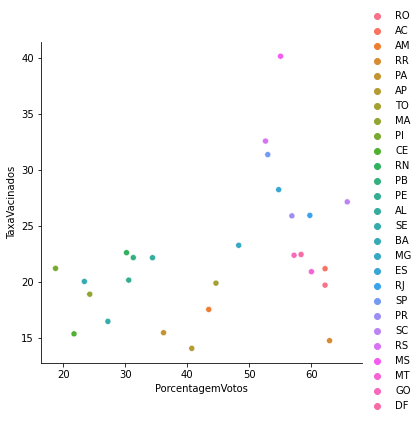

In [72]:
dfVotosVacina = PopulacaoVacinada.set_index('estado')
dfVotosVacina = pd.concat([dfVotosVacina,dfVotos], axis=1,join='inner')
dfVotosVacina
toPlot = dfVotosVacina[['PorcentagemVotos','TaxaVacinados']]
sns.relplot(x=toPlot.PorcentagemVotos, y=toPlot.TaxaVacinados, hue=toPlot.index)